# 1 Download the data

### This time I'm interested in trend of US CPI and Unemployment rate, so I use FRED data

In [3]:
import pandas as pd
import numpy as np
import requests
import json

def fetch_fred_data(api_key, series_id):
    url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&file_type=json&api_key={api_key}"
    response = requests.get(url)
    dictionary = response.json()['observations']
    df = pd.DataFrame(dictionary)[['date','value']]
    df.value = df.value.replace(".", np.nan).astype(float)
    df = df.dropna()
    return df

api_key = "d8aa2d4677eac76e6de871e44810b131"    


,date,value
0,1948-01-01,3.4
1,1948-02-01,3.8


### Unemployment rate

In [6]:


 
    
unrate = fetch_fred_data(api_key, "UNRATE")
unrate

,date,value
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
922,2024-11-01,4.2
923,2024-12-01,4.1
924,2025-01-01,4.0
925,2025-02-01,4.1


### CPI

In [5]:

cpi = fetch_fred_data(api_key,"CPIAUCSL")
cpi

,date,value
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
934,2024-11-01,316.449
935,2024-12-01,317.603
936,2025-01-01,319.086
937,2025-02-01,319.775


# 2 Change the data to interested time interval

In [7]:
unrate1 = unrate[(unrate['date'] >= '2019-01-01') & (unrate['date']<= '2023-01-01')]

In [8]:
unrate1

,date,value
852,2019-01-01,4.0
853,2019-02-01,3.8
854,2019-03-01,3.8
855,2019-04-01,3.7
856,2019-05-01,3.6
857,2019-06-01,3.6
858,2019-07-01,3.7
859,2019-08-01,3.6
860,2019-09-01,3.5
861,2019-10-01,3.6


In [9]:
cpi1 = cpi[(cpi['date'] >= '2019-01-01') & (cpi['date']<= '2023-01-01')]

# 3 Descriptive Statistics

<AxesSubplot:>

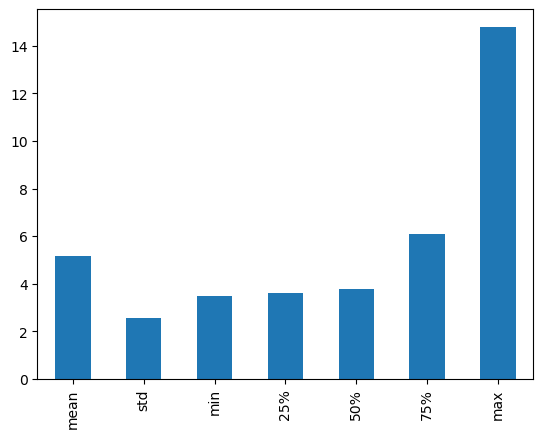

In [14]:
unrate1['value'].describe().drop(['count'],axis=0).plot(kind ='bar')

<AxesSubplot:>

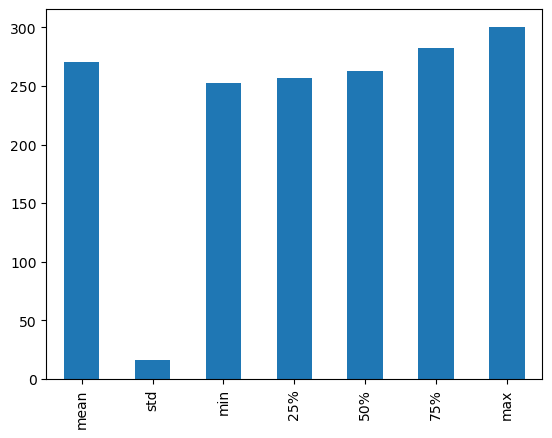

In [15]:
cpi1['value'].describe().drop(['count'],axis=0).plot(kind ='bar')

# 4 Merge these two datasets

In [42]:
## merge

df_merge = pd.merge(
    cpi1, unrate1,
    
    how='inner', on =['date']
    
)
df_merge.head(10)

## rename x as cpi y as unemployment

table = df_merge.rename(columns={'value_x': 'CPI', 'value_y': 'Unemployment'}).dropna()
table.head(2)

table['Inflation Rate'] = table['CPI'].pct_change() * 100
table=table.dropna()
table.head(2)

,date,CPI,Unemployment,Inflation Rate
1,2019-02-01,253.319,3.8,0.300126
2,2019-03-01,254.277,3.8,0.378179


# 5 Graphs 

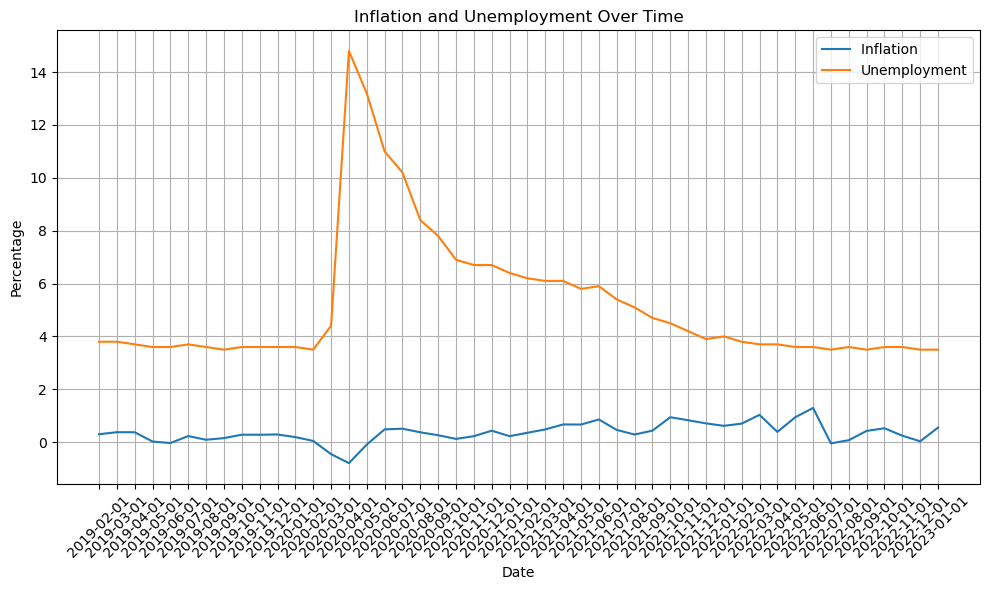

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(table['date'], table['Inflation Rate'], label='Inflation ')
plt.plot(table['date'], table['Unemployment'], label='Unemployment')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.title('Inflation and Unemployment Over Time')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

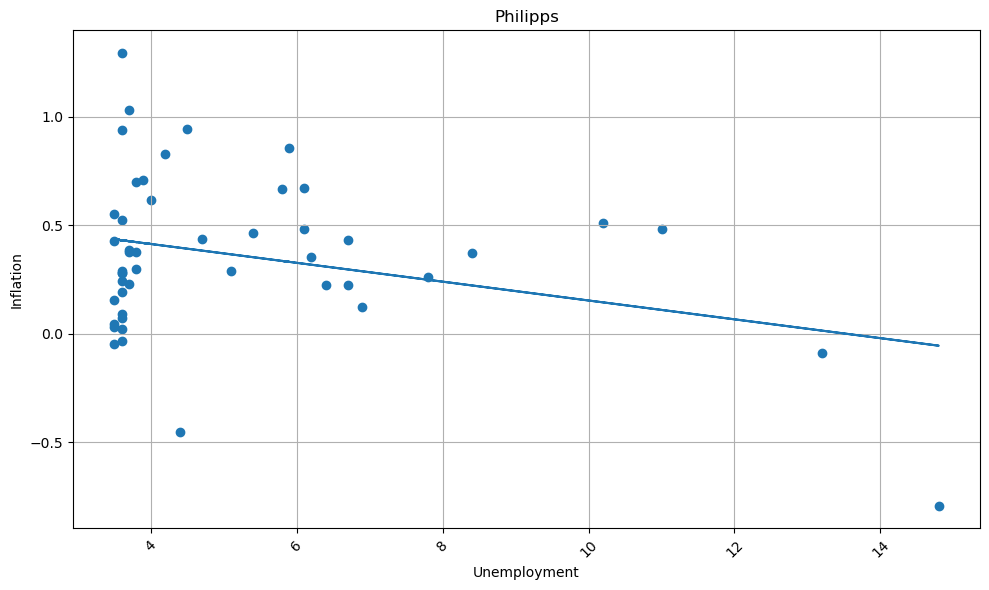

In [45]:
import statsmodels.api as sm
x = sm.add_constant(table['Unemployment'])
ols = sm.OLS(table['Inflation Rate'],x).fit()
table['OLS_Fitted'] = ols.fittedvalues
plt.figure(figsize=(10, 6))
plt.scatter(table['Unemployment'], table['Inflation Rate'])
plt.plot(table['Unemployment'], table['OLS_Fitted'])
plt.ylabel('Inflation')
plt.xlabel('Unemployment')
plt.title('Philipps')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()